In [1]:
import pandas as pd
import src.firebase_functions
import src.process
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import pyLDAvis.gensim
import matplotlib.pyplot as plt

/Users/carterward/Documents/GitHub/Topic-Mapping/.venv/lib/python3.8/site-packages/ipykernel/pylab/config.py:70: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [2]:
articles_df = pd.read_csv('data/large_article_sample.csv')
tokenized_articles = articles_df["tokenized_content"].values
tokenized_articles = [content.split(' ') for content in tokenized_articles if not isinstance(content, float)]

/Users/carterward/Documents/GitHub/Topic-Mapping/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


In [3]:
dictionary = Dictionary(tokenized_articles)
dictionary.filter_extremes(no_below=10, no_above=0.2)

/Users/carterward/Documents/GitHub/Topic-Mapping/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_articles]

/Users/carterward/Documents/GitHub/Topic-Mapping/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


In [5]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 15573
Number of documents: 9743
[[(0, 2), (1, 3), (2, 2), (3, 1), (4, 1), (5, 5), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 3), (19, 1), (20, 11), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 8), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 3), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 4), (64, 12), (65, 1), (66, 1), (67, 1), (68, 2), (69, 6), (70, 2), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 2), (77, 2), (78, 4), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 3), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1),

In [6]:
num_topics = 30
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1 

/Users/carterward/Documents/GitHub/Topic-Mapping/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

/Users/carterward/Documents/GitHub/Topic-Mapping/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

/Users/carterward/Documents/GitHub/Topic-Mapping/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
print(lda_model.print_topics())

[(0, '0.027*"portland" + 0.026*"ice" + 0.021*"county" + 0.017*"plane" + 0.015*"area" + 0.013*"atlanta" + 0.013*"air" + 0.012*"flight" + 0.012*"north" + 0.011*"storm"'), (1, '0.021*"twitter" + 0.018*"medium" + 0.011*"breitbart" + 0.011*"press" + 0.011*"tweet" + 0.010*"event" + 0.009*"fox" + 0.009*"march" + 0.009*"reporter" + 0.009*"comment"'), (2, '0.024*"study" + 0.017*"health" + 0.015*"drug" + 0.015*"research" + 0.014*"doctor" + 0.013*"patient" + 0.012*"medical" + 0.012*"climate" + 0.012*"human" + 0.011*"science"'), (3, '0.012*"play" + 0.011*"game" + 0.009*"team" + 0.007*"second" + 0.006*"season" + 0.005*"watch" + 0.005*"friend" + 0.005*"night" + 0.005*"lose" + 0.004*"guy"'), (4, '0.022*"attack" + 0.017*"military" + 0.016*"war" + 0.013*"security" + 0.013*"islamic" + 0.012*"isis" + 0.011*"iraq" + 0.011*"syria" + 0.010*"iran" + 0.008*"terrorist"'), (5, '0.019*"refugee" + 0.016*"disease" + 0.015*"zika" + 0.012*"migrant" + 0.012*"virus" + 0.011*"bear" + 0.010*"brazil" + 0.010*"pregnant" +

In [24]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_articles, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5880548424903405


In [26]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_articles, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -2.057918294894934


In [27]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

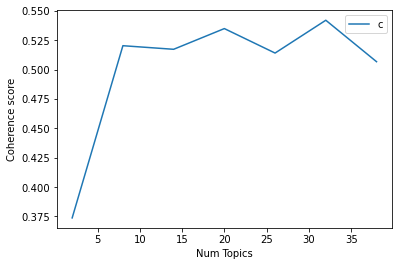

In [29]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_articles, start=2, limit=40, step=6)
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig("coherence_plot_articles_updated.png")
plt.show()

In [9]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(LDAvis_prepared, 'large_articles_lda.html')

/Users/carterward/Documents/GitHub/Topic-Mapping/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
